
# SU2 bosonic matrix model: Lambda=2, EvolvedOperatorAnsatz 

- Hamiltonian-variational-ansatz

 https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.hamiltonian_variational_ansatz

- Evolved Operator ansatz

  https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.evolved_operator_ansatz

In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

import qiskit
from qiskit.quantum_info import Pauli
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver

import sys
sys.path.append('../../utility')
from vqe_run import *
from qc_ansatze import *

# QC

In [2]:
from qiskit.circuit.library import EvolvedOperatorAnsatz
ops_random = [Pauli("ZZIIII"), Pauli("IZIIZI"), Pauli("IXIXIX")]

#ops_id has no parameters
ops_id = [Pauli('IIIIII')]

ops_H = [Pauli('IIIIIZ'), Pauli('IIIIZI'), Pauli('IIIZII'),
        Pauli('IIZIII'),Pauli('IXXIXX'), Pauli('IZIIII'), 
        Pauli('XIXXIX'), Pauli('XXIXXI'), Pauli('ZIIIII')]

ops_Hpartial =  [Pauli('IIIIIZ'), Pauli('IIIZII'),
        Pauli('IXXIXX'), Pauli('IZIIII'), 
        Pauli('XIXXIX') ]

#ops_H_full = [Pauli('IIIIII'),Pauli('IIIIIZ'), Pauli('IIIIZI'), 
#        Pauli('IIIZII'),Pauli('IIZIII'), Pauli('IXXIXX'), Pauli('IZIIII'), 
#       Pauli('XIXXIX'), Pauli('XXIXXI'), Pauli('ZIIIII')]
#this is the same as above since the IIIIII op doesnt contribute any params

ev_op_r = EvolvedOperatorAnsatz(ops_random, reps=1, insert_barriers=True)
ev_op_r3 = EvolvedOperatorAnsatz(ops_random, reps=3, insert_barriers=True)

ev_op_H = EvolvedOperatorAnsatz(ops_H, reps=1, insert_barriers=True)
ev_op_H_2f = EvolvedOperatorAnsatz(ops_H, reps=2, insert_barriers=True)
ev_op_H_3f = EvolvedOperatorAnsatz(ops_H, reps=3, insert_barriers=True)

ev_op_Hp = EvolvedOperatorAnsatz(ops_Hpartial, reps=1, insert_barriers=True)
ev_op_Hp2 = EvolvedOperatorAnsatz(ops_Hpartial, reps=2, insert_barriers=True)
ev_op_Hp3 = EvolvedOperatorAnsatz(ops_Hpartial, reps=3, insert_barriers=True)
ev_op_Hp4 = EvolvedOperatorAnsatz(ops_Hpartial, reps=4, insert_barriers=True)

ansatz_list = [ev_op_r, ev_op_r3, ev_op_H, ev_op_H_2f, 
               ev_op_H_3f, ev_op_Hp, ev_op_Hp2, ev_op_Hp3, ev_op_Hp4]

ansatz_names = ['ev_op_r','ev_op_r3', 'ev_op_H', 'ev_op_H_2f',
                'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3','ev_op_Hp4']

print(f'number of params: {[ansatz_list[i].num_parameters for i in range(len(ansatz_list))]}')


number of params: [3, 9, 9, 18, 27, 5, 10, 15, 20]


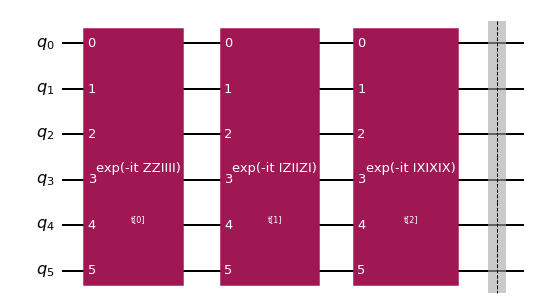

In [3]:
ansatz_list[0].decompose().draw("mpl")

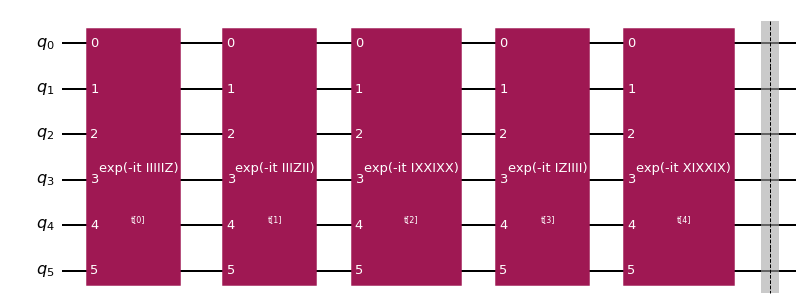

In [4]:
ansatz_list[5].decompose().draw("mpl")

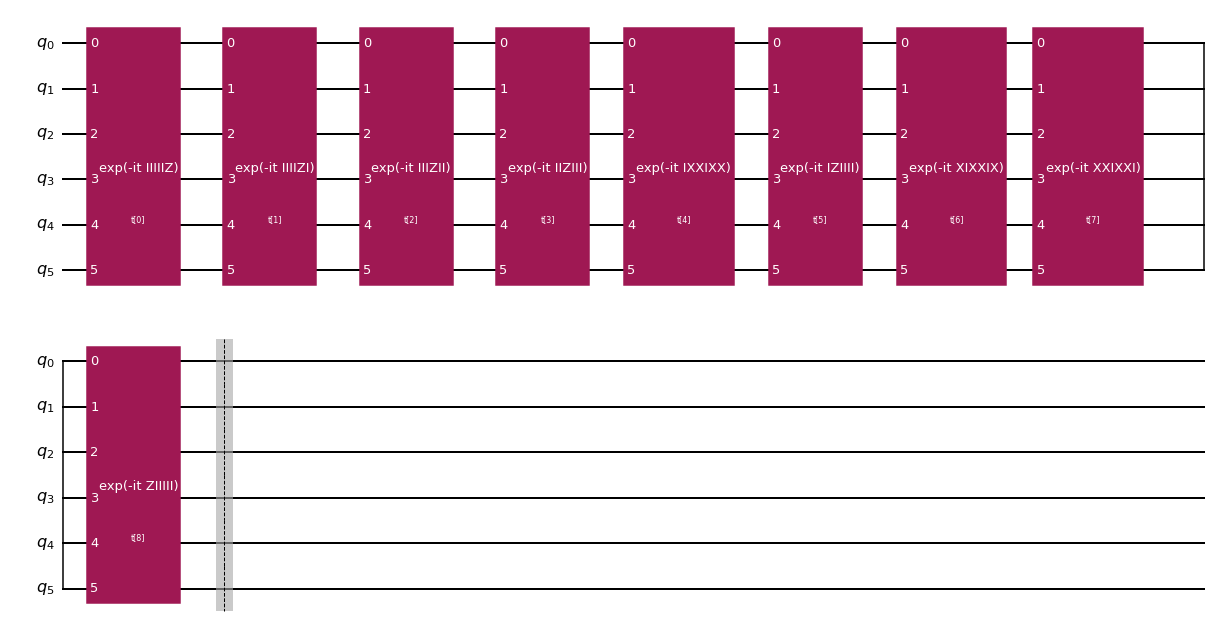

In [22]:
ansatz_list[2].decompose().draw("mpl")

# Coupling = 0.2

In [3]:
Hpauli =[('IIIIII', 6.15),
 ('IIIIIZ', -0.5),
 ('IIIIZI', -0.5),
 ('IIIZII', -0.5),
 ('IIZIII', -0.5),
 ('IXXIXX', -0.05),
 ('IZIIII', -0.5),
 ('XIXXIX', -0.05),
 ('XXIXXI', -0.05),
 ('ZIIIII', -0.5)]

H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [3.14807787 4.14674965 4.14674965 4.14674965]


3.14808

In [4]:
#L_BFGS_B, SLSQP yield bad results 
res_list = []
opt_list = [COBYLA, SPSA]
opt_list_name = ['COBYLA', 'SPSA']
for j in range(len(opt_list)):
    print('----------------------------------')
    print(f'optimizer is {opt_list_name[j]}')
    print('----------------------------------')
    for i in range(len(ansatz_list)):
        print(f'At step {(j,i)} with {ansatz_names[i]}')
        qve = QVE(opt_list[j], ansatz_list[i], H4q, iterations_=300)
        result = qve.run_qve_w_specified_optimizer()
        print(f'Length of this optimization {len(qve.values)} \n')
        res_list.append(pd.DataFrame({f'{ansatz_names[i]}_{opt_list_name[j]}':qve.values}))
        
df1 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df1.to_csv('qve_l2_l0.2_op_ev.csv')

----------------------------------
optimizer is COBYLA
----------------------------------
At step (0, 0) with ev_op_r
VQE result: 3.14980
Length of this optimization 36 

At step (0, 1) with ev_op_r3
VQE result: 3.15117
Length of this optimization 89 

At step (0, 2) with ev_op_H
VQE result: 3.15117
Length of this optimization 111 

At step (0, 3) with ev_op_H_2f
VQE result: 3.15000
Length of this optimization 162 

At step (0, 4) with ev_op_H_3f
VQE result: 3.14883
Length of this optimization 300 

At step (0, 5) with ev_op_Hp
VQE result: 3.14746
Length of this optimization 67 

At step (0, 6) with ev_op_Hp2
VQE result: 3.14805
Length of this optimization 112 

At step (0, 7) with ev_op_Hp3
VQE result: 3.14902
Length of this optimization 191 

At step (0, 8) with ev_op_Hp4
VQE result: 3.14844
Length of this optimization 238 

----------------------------------
optimizer is SPSA
----------------------------------
At step (1, 0) with ev_op_r
VQE result: 3.14980
Length of this optimizati

In [5]:
df1

,ev_op_r_COBYLA,ev_op_r3_COBYLA,ev_op_H_COBYLA,ev_op_H_2f_COBYLA,ev_op_H_3f_COBYLA,ev_op_Hp_COBYLA,ev_op_Hp2_COBYLA,ev_op_Hp3_COBYLA,ev_op_Hp4_COBYLA,ev_op_r_SPSA,ev_op_r3_SPSA,ev_op_H_SPSA,ev_op_H_2f_SPSA,ev_op_H_3f_SPSA,ev_op_Hp_SPSA,ev_op_Hp2_SPSA,ev_op_Hp3_SPSA,ev_op_Hp4_SPSA
0,6.029688,3.733594,6.453516,6.946094,6.668945,7.078516,6.607227,4.764453,6.023633,5.701563,4.162695,6.316992,7.014453,6.822266,7.149805,6.357031,4.055859,5.944922
1,6.029688,3.733594,6.453516,6.946094,6.668945,7.078516,6.607227,4.764453,6.023633,6.150391,3.802344,6.438281,7.090625,6.230273,6.776367,6.887891,5.069336,6.902539
2,6.029688,3.733594,6.453516,6.946094,6.668945,7.078516,6.607227,4.764453,6.023633,5.728906,4.459570,6.844141,7.103906,5.271289,7.150781,6.620313,4.272852,6.174805
3,4.611719,6.086523,6.453516,6.946094,6.668945,6.082422,6.597461,5.688281,6.137695,6.148633,3.984180,6.179102,6.595898,5.931836,7.042383,6.833984,6.762109,5.607227
4,3.310938,4.476562,6.453516,6.946094,6.668945,6.163281,6.978125,4.368359,6.887305,5.699414,3.181836,5.794727,6.958203,4.195703,7.147656,6.455273,6.020898,6.126172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.220117,3.166211,3.335156,3.617188,3.762500,3.320313,3.282031,3.399023,4.028320
647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.185547,3.152930,3.300977,3.448633,3.593945,3.222070,3.220703,3.354688,3.751953
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.217188,3.192773,3.356250,3.838672,3.900781,3.274805,3.528711,3.258398,3.759180
649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.188477,3.161328,3.273242,3.557813,3.921289,3.242188,3.339453,3.176953,3.808594


#  Coupling = 0.5

In [6]:
Hpauli =[('IIIIII', 6.375),
 ('IIIIIZ', -0.5),
 ('IIIIZI', -0.5),
 ('IIIZII', -0.5),
 ('IIZIII', -0.5),
 ('IXXIXX', -0.125),
 ('IZIIII', -0.5),
 ('XIXXIX', -0.125),
 ('XXIXXI', -0.125),
 ('ZIIIII', -0.5)]

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver
H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [3.36254139 4.35352431 4.35352431 4.35352431]


3.36254

In [7]:
#L_BFGS_B, SLSQP yield bad results 
res_list = []
opt_list = [COBYLA, SPSA]
opt_list_name = ['COBYLA', 'SPSA']
for j in range(len(opt_list)):
    print('----------------------------------')
    print(f'optimizer is {opt_list_name[j]}')
    print('----------------------------------')
    for i in range(len(ansatz_list)):
        print(f'At step {(j,i)} with {ansatz_names[i]}')
        qve = QVE(opt_list[j], ansatz_list[i], H4q, iterations_=300)
        result = qve.run_qve_w_specified_optimizer()
        print(f'Length of this optimization {len(qve.values)} \n')
        res_list.append(pd.DataFrame({f'{ansatz_names[i]}_{opt_list_name[j]}':qve.values}))
        
df1 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df1.to_csv('qve_l2_l0.5_op_ev.csv')

----------------------------------
optimizer is COBYLA
----------------------------------
At step (0, 0) with ev_op_r
VQE result: 3.37451
Length of this optimization 36 

At step (0, 1) with ev_op_r3
VQE result: 3.37305
Length of this optimization 90 

At step (0, 2) with ev_op_H
VQE result: 3.36914
Length of this optimization 113 

At step (0, 3) with ev_op_H_2f
VQE result: 3.37012
Length of this optimization 163 

At step (0, 4) with ev_op_H_3f
VQE result: 3.36426
Length of this optimization 290 

At step (0, 5) with ev_op_Hp
VQE result: 3.37988
Length of this optimization 53 

At step (0, 6) with ev_op_Hp2
VQE result: 3.37354
Length of this optimization 113 

At step (0, 7) with ev_op_Hp3
VQE result: 3.37744
Length of this optimization 166 

At step (0, 8) with ev_op_Hp4
VQE result: 3.36084
Length of this optimization 210 

----------------------------------
optimizer is SPSA
----------------------------------
At step (1, 0) with ev_op_r
VQE result: 3.37451
Length of this optimizati

In [8]:
df1

,ev_op_r_COBYLA,ev_op_r3_COBYLA,ev_op_H_COBYLA,ev_op_H_2f_COBYLA,ev_op_H_3f_COBYLA,ev_op_Hp_COBYLA,ev_op_Hp2_COBYLA,ev_op_Hp3_COBYLA,ev_op_Hp4_COBYLA,ev_op_r_SPSA,ev_op_r3_SPSA,ev_op_H_SPSA,ev_op_H_2f_SPSA,ev_op_H_3f_SPSA,ev_op_Hp_SPSA,ev_op_Hp2_SPSA,ev_op_Hp3_SPSA,ev_op_Hp4_SPSA
0,6.254395,3.959473,6.711914,7.205078,6.95752,7.325195,6.902832,5.055664,6.322754,5.926270,4.390625,6.546387,7.258789,7.094727,7.374512,6.646484,4.198242,6.231445
1,6.254395,3.959473,6.711914,7.205078,6.95752,7.325195,6.902832,5.055664,6.322754,6.375977,4.030273,6.662109,7.378906,6.464355,7.026855,7.170898,5.296387,7.137207
2,6.254395,3.959473,6.711914,7.205078,6.95752,7.325195,6.902832,5.055664,6.322754,5.955078,4.684570,7.125977,7.400391,5.537598,7.376953,6.906250,4.512207,6.425293
3,4.836426,6.312988,6.711914,7.205078,6.95752,6.252930,6.890137,5.947266,6.426270,6.371582,4.203613,6.389160,6.792480,6.204590,7.316895,7.124023,6.973633,5.826660
4,3.535645,4.705078,6.711914,7.205078,6.95752,6.455078,7.261719,4.651367,7.187012,5.920898,3.406250,6.037598,7.141602,4.436523,7.369141,6.722168,6.274902,6.420898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.444824,3.378418,3.578613,4.168945,4.272949,3.545410,3.534180,3.563477,3.721680
647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.411133,3.387695,3.498535,3.907715,3.911133,3.452148,3.481445,3.506348,3.437012
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.441895,3.412109,3.580566,4.591797,3.866211,3.485840,3.464844,3.950195,3.710449
649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.414062,3.417480,3.519531,4.098633,4.205078,3.473145,3.456543,3.759277,3.745605


#  Coupling = 1.0

In [9]:
Hpauli =[('IIIIII', 6.75),
  ('IIIIIZ', -0.5),
  ('IIIIZI', -0.5),
  ('IIIZII', -0.5),
  ('IIZIII', -0.5),
  ('IXXIXX', -0.25),
  ('IZIIII', -0.5),
  ('XIXXIX', -0.25),
  ('XXIXXI', -0.25),
  ('ZIIIII', -0.5)]

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver
H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [3.69722436 4.65707692 4.65707692 4.65707692]


3.69722

In [10]:
#L_BFGS_B, SLSQP yield bad results 
res_list = []
opt_list = [COBYLA, SPSA]
opt_list_name = ['COBYLA', 'SPSA']
for j in range(len(opt_list)):
    print('----------------------------------')
    print(f'optimizer is {opt_list_name[j]}')
    print('----------------------------------')
    for i in range(len(ansatz_list)):
        print(f'At step {(j,i)} with {ansatz_names[i]}')
        qve = QVE(opt_list[j], ansatz_list[i], H4q, iterations_=300)
        result = qve.run_qve_w_specified_optimizer()
        print(f'Length of this optimization {len(qve.values)} \n')
        res_list.append(pd.DataFrame({f'{ansatz_names[i]}_{opt_list_name[j]}':qve.values}))
        
df1 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df1.to_csv('qve_l2_l1.0_op_ev.csv')

----------------------------------
optimizer is COBYLA
----------------------------------
At step (0, 0) with ev_op_r
VQE result: 3.74902
Length of this optimization 36 

At step (0, 1) with ev_op_r3
VQE result: 3.74414
Length of this optimization 88 

At step (0, 2) with ev_op_H
VQE result: 3.72656
Length of this optimization 93 

At step (0, 3) with ev_op_H_2f
VQE result: 3.71484
Length of this optimization 169 

At step (0, 4) with ev_op_H_3f
VQE result: 3.71387
Length of this optimization 255 

At step (0, 5) with ev_op_Hp
VQE result: 3.74902
Length of this optimization 50 

At step (0, 6) with ev_op_Hp2
VQE result: 3.73242
Length of this optimization 110 

At step (0, 7) with ev_op_Hp3
VQE result: 3.71582
Length of this optimization 171 

At step (0, 8) with ev_op_Hp4
VQE result: 3.70508
Length of this optimization 229 

----------------------------------
optimizer is SPSA
----------------------------------
At step (1, 0) with ev_op_r
VQE result: 3.74902
Length of this optimizatio

#  Coupling = 2.0

In [11]:
Hpauli =[('IIIIII', 7.5),
  ('IIIIIZ', -0.5),
  ('IIIIZI', -0.5),
  ('IIIZII', -0.5),
  ('IIZIII', -0.5),
  ('IXXIXX', -0.5),
  ('IZIIII', -0.5),
  ('XIXXIX', -0.5),
  ('XXIXXI', -0.5),
  ('ZIIIII', -0.5)]
H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [4.26794919 5.09678807 5.09678807 5.09678807]


4.26795

In [12]:
res_list = []
opt_list = [COBYLA, SPSA]
opt_list_name = ['COBYLA', 'SPSA']
for j in range(len(opt_list)):
    print('-----------------------------------')
    print(f'optimizer is {opt_list_name[j]}')
    print('-----------------------------------')
    for i in range(len(ansatz_list)):
        print(f'At step {(j,i)} with {ansatz_names[i]}')
        qve = QVE(opt_list[j], ansatz_list[i], H4q, iterations_=300)
        result = qve.run_qve_w_specified_optimizer()
        print(f'Length of this optimization {len(qve.values)} \n')
        res_list.append(pd.DataFrame({f'{ansatz_names[i]}_{opt_list_name[j]}':qve.values}))
        
df1 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df1.to_csv('qve_l2_l2.0_op_ev.csv')

-----------------------------------
optimizer is COBYLA
-----------------------------------
At step (0, 0) with ev_op_r
VQE result: 4.49805
Length of this optimization 36 

At step (0, 1) with ev_op_r3
VQE result: 4.48535
Length of this optimization 78 

At step (0, 2) with ev_op_H
VQE result: 4.29297
Length of this optimization 110 

At step (0, 3) with ev_op_H_2f
VQE result: 4.28906
Length of this optimization 182 

At step (0, 4) with ev_op_H_3f
VQE result: 4.29102
Length of this optimization 276 

At step (0, 5) with ev_op_Hp
VQE result: 4.44141
Length of this optimization 66 

At step (0, 6) with ev_op_Hp2
VQE result: 4.39453
Length of this optimization 121 

At step (0, 7) with ev_op_Hp3
VQE result: 4.29883
Length of this optimization 181 

At step (0, 8) with ev_op_Hp4
VQE result: 4.28906
Length of this optimization 215 

-----------------------------------
optimizer is SPSA
-----------------------------------
At step (1, 0) with ev_op_r
VQE result: 4.49805
Length of this optimi

In [13]:
df1

,ev_op_r_COBYLA,ev_op_r3_COBYLA,ev_op_H_COBYLA,ev_op_H_2f_COBYLA,ev_op_H_3f_COBYLA,ev_op_Hp_COBYLA,ev_op_Hp2_COBYLA,ev_op_Hp3_COBYLA,ev_op_Hp4_COBYLA,ev_op_r_SPSA,ev_op_r3_SPSA,ev_op_H_SPSA,ev_op_H_2f_SPSA,ev_op_H_3f_SPSA,ev_op_Hp_SPSA,ev_op_Hp2_SPSA,ev_op_Hp3_SPSA,ev_op_Hp4_SPSA
0,7.377930,5.088867,8.003906,8.5,8.400391,8.558594,8.380859,6.511719,7.818359,7.049805,5.530273,7.693359,8.480469,8.457031,8.498047,8.093750,4.910156,7.664062
1,7.377930,5.088867,8.003906,8.5,8.400391,8.558594,8.380859,6.511719,7.818359,7.503906,5.169922,7.781250,8.820312,7.634766,8.279297,8.585938,6.431641,8.310547
2,7.377930,5.088867,8.003906,8.5,8.400391,8.558594,8.380859,6.511719,7.818359,7.085938,5.809570,8.535156,8.882812,6.869141,8.507812,8.335938,5.708984,7.677734
3,5.959961,7.445312,8.003906,8.5,8.400391,7.105469,8.353516,7.242188,7.869141,7.486328,5.300781,7.439453,7.775391,7.568359,8.689453,8.574219,8.031250,6.923828
4,4.659180,5.847656,8.003906,8.5,8.400391,7.914062,8.679688,6.066406,8.685547,7.028320,4.528320,7.251953,8.058594,5.640625,8.476562,8.056641,7.544922,7.894531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.568359,4.592773,4.544922,4.759766,5.359375,4.607422,4.361328,4.552734,5.042969
647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.539062,4.590820,4.416016,4.566406,4.722656,4.527344,4.386719,4.384766,5.117188
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.568359,4.525391,4.494141,4.794922,5.593750,4.564453,4.558594,4.667969,4.695312
649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.541992,4.590820,4.388672,4.406250,4.861328,4.576172,4.519531,4.675781,4.509766
